# **Project Name - Yes Bank Stock Closing Price Prediction**

### **Project Type - Classification**

### **Contribution** - Individual

### **Team Members**
Team Member 1 – Ankita Nadarge

# **Project Summary**

Yes Bank is a prominent financial institution in India offering a diverse range of services including savings and current accounts, fixed and recurring deposits, debit and credit cards, cash management, privilege and institutional banking, NRI banking, trade finance, digital banking, and agricultural solutions.

This project focuses on analyzing the stock price behavior of Yes Bank. The goal is to perform Exploratory Data Analysis (EDA) to uncover underlying patterns and then develop a machine learning model capable of predicting the closing stock price.

Technologies and Tools Used:

For data preprocessing, visualization, and modeling, the following tools and Python libraries were utilized:


*   Pandas and NumPy for data manipulation and numerical operations
*   Matplotlib and Seaborn for data visualizatio
*   Scikit-learn for model implementation using:
                *   Linear Regression
                *   Random Forest
                *   Ridge Regression






# **GitHub Link**

GitHub Link - https://github.com/nadargeAnkita/Data-Science-Projects.git

# **Problem Statement**

To build a machine learning model that accurately predicts whether a customer will default on a bank loan using historical data. The model will help financial institutions assess credit risk and make informed lending decisions.

# **Let's Begin**

## **1.Know Your Data**

### **Import Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### **Dataset Loading**

In [2]:
# Dataset Loading
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

### **Dataset First View**

In [3]:
# Dataset First View
df.sample(5)

,Date,Open,High,Low,Close
88,Nov-12,82.54,89.60,82.22,88.48
4,Nov-05,13.35,13.88,12.88,13.41
181,Aug-20,12.00,17.16,11.85,14.37
141,Apr-17,309.60,330.58,300.20,326.14
71,Jun-11,60.40,63.39,54.80,62.38


### **Dataset Rows & Columns count**

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

In [5]:
number_of_rows = df.shape[0]
number_of_columns = df.shape[1]

print(f"Number of rows: {number_of_rows}")
print(f"Number of columns: {number_of_columns}")

Number of rows: 185
Number of columns: 5


### **Dataset Information**

In [6]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### **Duplicate Value**

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

### **Missing Values/Null Values**

In [8]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

np.int64(0)

### **Visualizing the missing values**

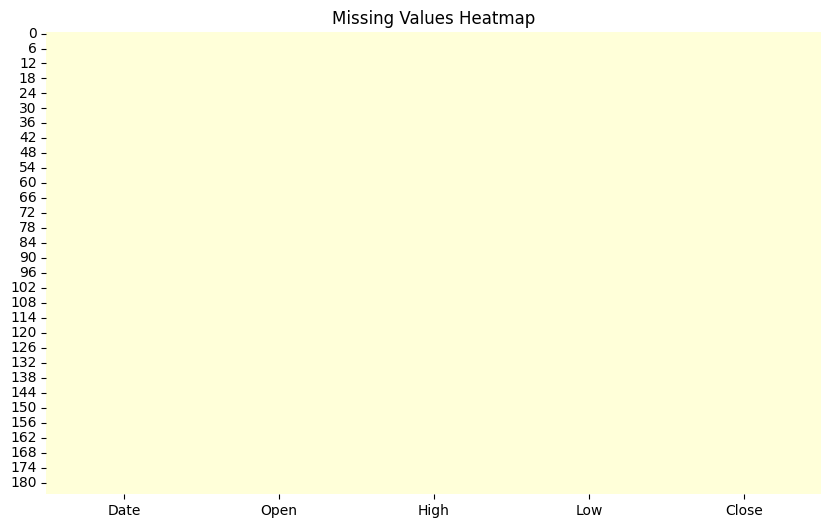


Percentage of Missing Values:
Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64


In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Missing Values Heatmap')
plt.show()
print("\nPercentage of Missing Values:")
print((df.isnull().sum() / len(df)) * 100)

# **What did you know about your dataset?**
### **1.Dataset Overview:**

The dataset contains historical stock price data of Yes Bank.

It includes daily or periodic records of the bank's trading data.

### **2.Rows & Columns:**

The dataset consists of 185 rows and 5 columns, meaning it represents 185 trading records (likely days, weeks, or months depending on the frequency of data collection).

### **3.Columns Present:**

**The columns are:**

**Date:** The trading date.

**Open:** Opening price of the stock.

**High:** Highest price of the stock on that day.

**Low:** Lowest price of the stock on that day.

**Close:** Closing price of the stock.


### **4.Missing Values:**

A heatmap shows no missing values, indicating the dataset is clean and complete.

### **5.Duplicate Records:**

No duplicate rows are found, meaning all trading records are unique.

### **6.Data Types:**

The Date column is of string (object) type and should be converted to datetime for time-based analysis.

The remaining columns are numerical (float64), suitable for EDA, visualization, and predictive modeling.


## **2.Understanding Your Variables**

In [10]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Variable Description**

The name of the individual varriables mentioned in the columns of the data set and the descriptions of them are listed below:

⦁ Date: Month and day information on which the information was recorded.(Categorical)

⦁ Open : Opening stock price.(Numeric)

⦁ High : Highest Stock price.(Numeric)

⦁ Low : Lowest Stock Price.(Numeric)

⦁ Close : Closing Stock Price.(Numeric)

### **Check Unique Values for each variable**

In [12]:
# Check Unique Values for each variable
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 185 .
No. of unique values in  Open is 183 .
No. of unique values in  High is 184 .
No. of unique values in  Low is 183 .
No. of unique values in  Close is 185 .


In [13]:
df['High'].unique()

array([ 14.  ,  14.88,  14.87,  14.47,  13.88,  14.44,  17.16,  16.97,
        20.95,  20.8 ,  21.8 ,  18.4 ,  17.2 ,  18.6 ,  18.88,  24.2 ,
        28.47,  29.66,  34.16,  32.6 ,  31.58,  31.99,  36.14,  36.38,
        41.04,  39.  ,  41.75,  47.3 ,  50.98,  54.  ,  55.56,  53.97,
        48.9 ,  35.8 ,  36.88,  32.22,  30.5 ,  28.98,  29.8 ,  25.  ,
        17.8 ,  16.56,  18.34,  12.5 ,  11.24,  17.51,  28.84,  31.08,
        33.16,  35.18,  41.3 ,  52.34,  54.98,  55.67,  57.58,  51.48,
        52.06,  59.48,  58.08,  59.9 ,  60.94,  68.88,  71.74,  76.  ,
        77.6 ,  68.36,  63.54,  57.69,  65.2 ,  68.26,  61.68,  63.39,
        68.  ,  63.96,  60.08,  64.8 ,  63.7 ,  59.8 ,  66.5 ,  74.8 ,
        77.88,  76.1 ,  70.59,  70.6 ,  73.19,  74.78,  77.69,  84.2 ,
        89.6 ,  95.  , 107.  , 107.8 , 100.15, 101.8 , 109.43, 102.94,
       100.4 ,  67.81,  78.94,  76.44,  77.27,  83.  ,  76.35,  62.7 ,
        83.36,  94.98, 117.6 , 117.57, 114.46, 118.69, 126.85, 137.8 ,
      

In [14]:
df['Open'].unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

## **3.Data Wrangling**

### **Data Wrangling Code**

In [15]:
YBC_df = df.copy()

In [16]:
YBC_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
# Write your code to make your dataset analysis ready.
YBC_df['Date']= pd.to_datetime(YBC_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [18]:
YBC_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### **What all manipulations have you done and insights you found?**

The given data set does not have any missing values or null values. Also there are no duplicate values in the data set as I have checked already. Since the 'Date' column was not arranged in a proper format, I have changed the 'Date' column in to the format Year-month-date that will be hepfull to visualize the data.

## **4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **Chart - 1**

**Univariate Analysis**

<Axes: xlabel='Open', ylabel='Density'>

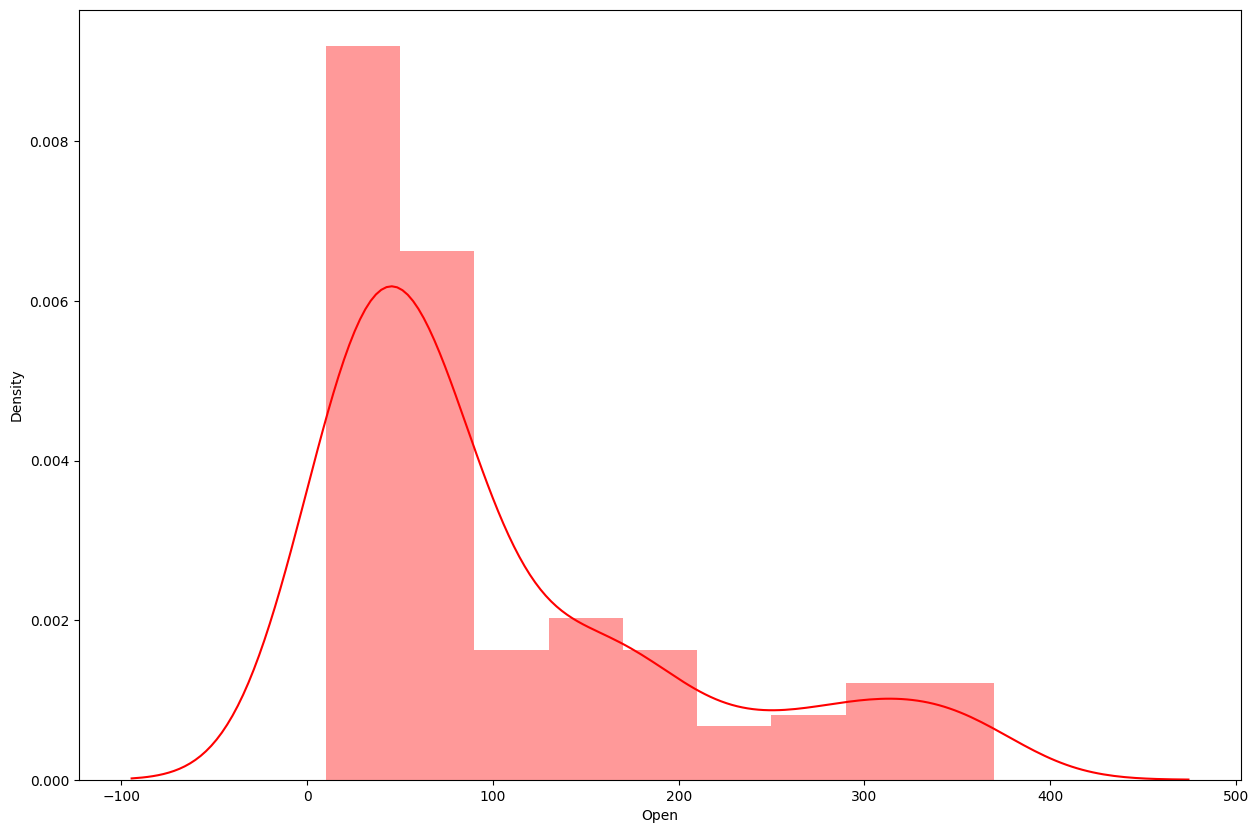

In [19]:
plt.figure(figsize=(15,10))
sns.distplot(YBC_df['Open'],color='r')

**1. Why did you pick the specific chart?**

To see the distribution of Closing price in the dataset I have used the dist plot as with the help of dist plot I will be able to check the skewness of the data and according to that data will be transformed to handle the skewness.

**2. What is/are the insight(s) found from the chart?**


The above chart shows that the 'Close' columnm data is possitively skewed. So I have to transform this column data to log scale data for handling the skewness.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of the 'Close' column that will help me to understand and the methods to be applied to tackle the skewness of the data.

### **Chart - 2**

In [20]:
numeric_features = YBC_df.describe().columns

In [21]:
numeric_features

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

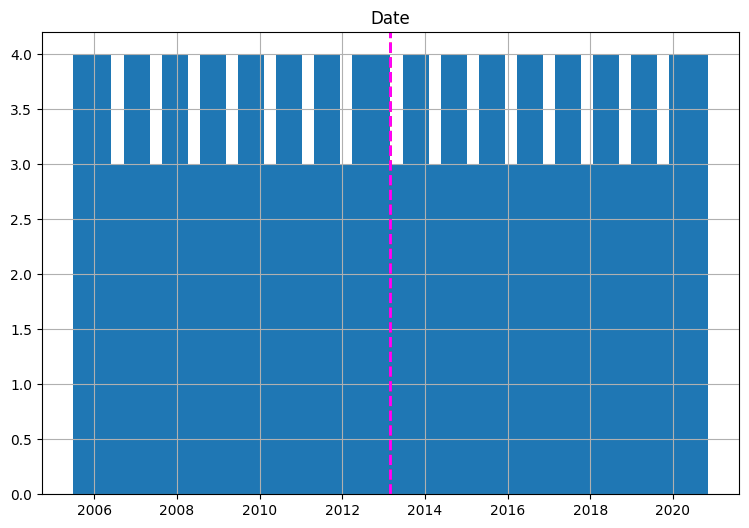

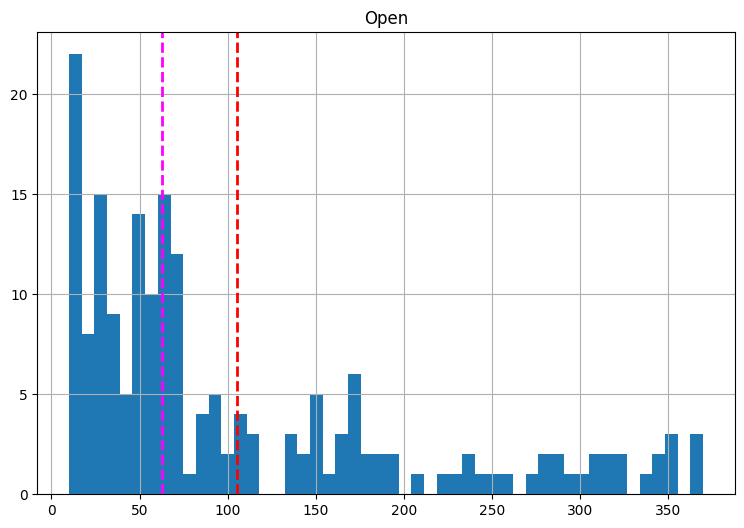

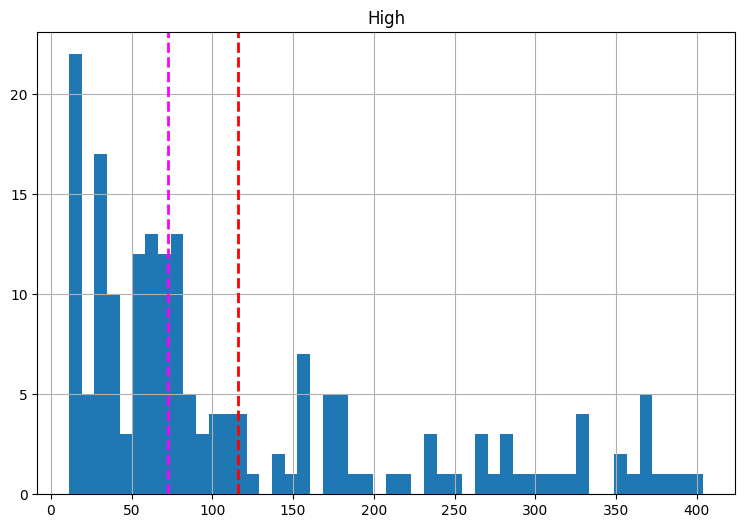

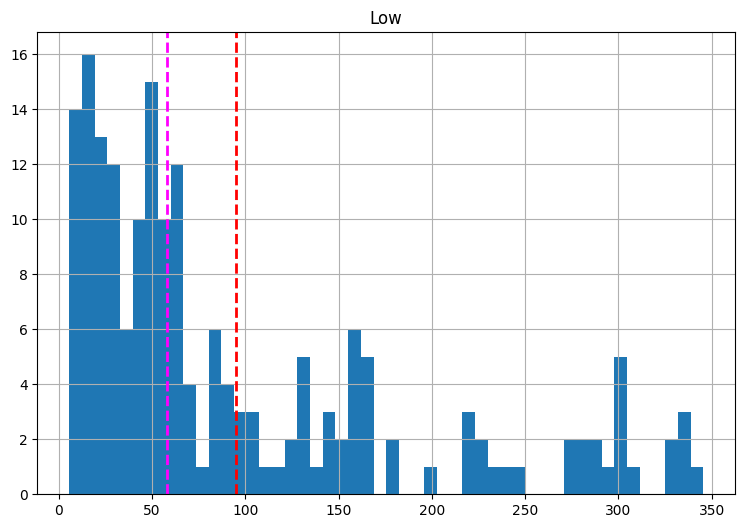

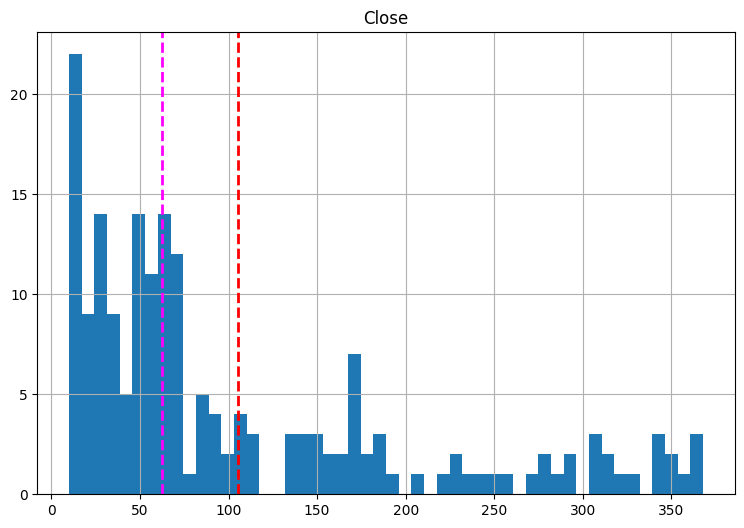

In [22]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YBC_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

**1. Why did you pick the specific chart?**

As histogram is a very popular tool so the chart will show the overview of each and every varriables information and gives a clear idea about the data set. It also sumarizes the measured data.

**2. What is/are the insight(s) found from the chart?**

From the above charts it can be clearly seen that all the numeric variables are possitively skewed. So I have to transform these column datas to log scale data for handling the skewness.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of all the numeric columns that will help me to understand and the methods to be applied to tackle the skewness of the data.

### **Chart - 3**

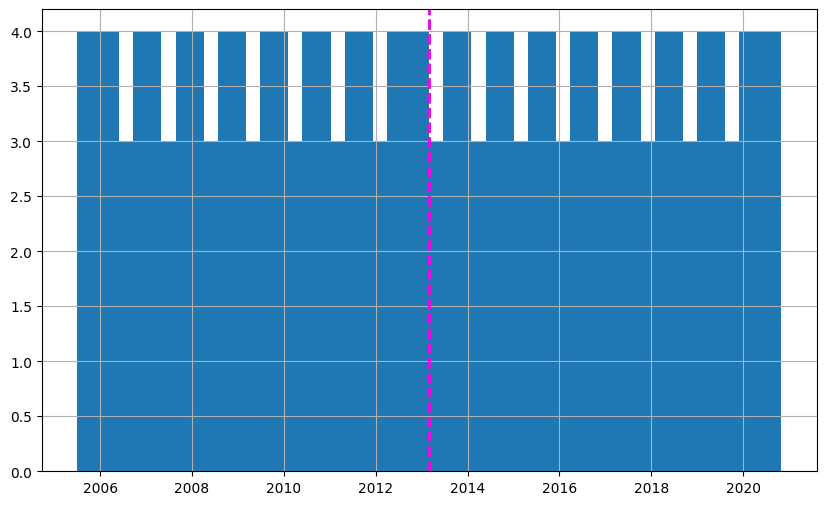

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = YBC_df['Date']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='g', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

**1. Why did you pick the specific chart?**

To see the distribution of 'Date' column which is a categorical in the dataset I have used the dist plot .

**2. What is/are the insight(s) found from the chart?**

As the Date column is categorical information and from the distogram plot it is clear that the date column is equally distributed.

### **Chart - 4**

**Scatter Plot Open and Close**

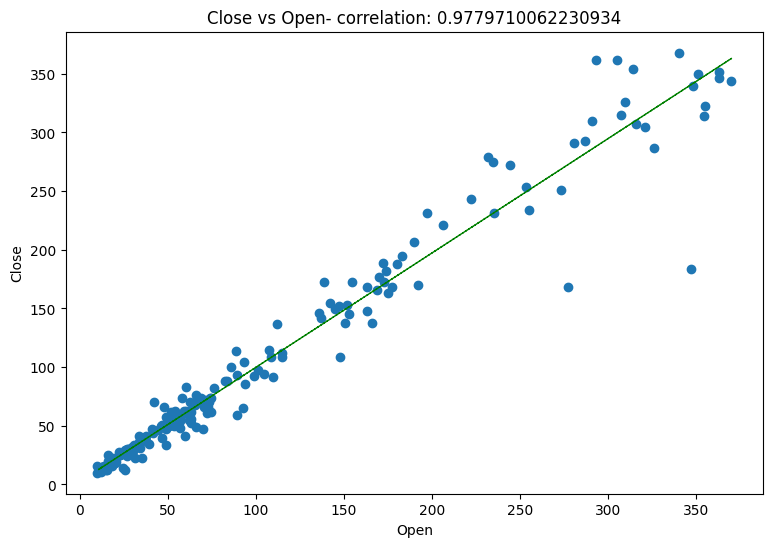

In [24]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['Open']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Open' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['Open'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['Open'])

plt.plot(YBC_df['Open'], y_hat, "g--", lw=1)

plt.show()

**1. Why did you pick the specific chart?**

The above scatter plot shows the relation between the Open and Close.

**2. What is/are the insight(s) found from the chart?**

As we can see that the Open and Close data are Highly correlated therefore we can say that the closing price is very much dependant upon the Opening price of the stock

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Open and Price indicates that Opening price will alway plays an important role to have an idea about closing price.

### **Chart - 5**

**Scatter Plot High and Close**

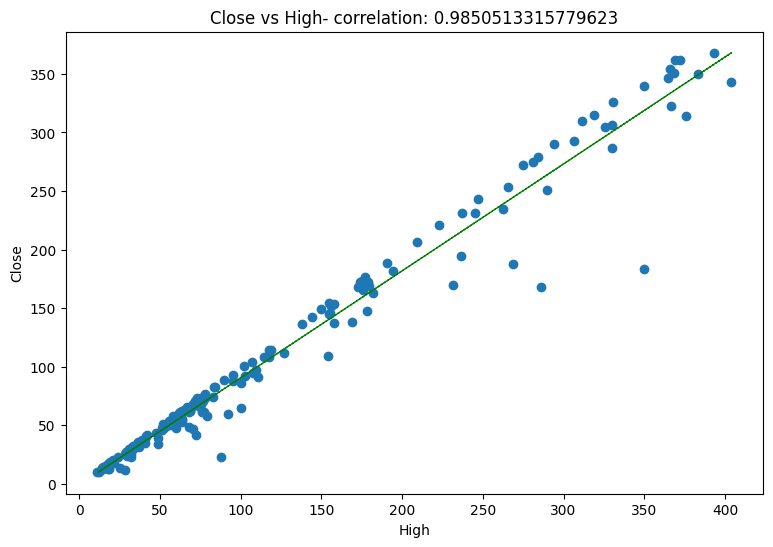

In [25]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['High']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'High' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['High'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['High'])

plt.plot(YBC_df['High'], y_hat, "g--", lw=1)

plt.show()

**1. Why did you pick the specific chart?**

The above scatter plot shows the relation between the High and Close.

**2. What is/are the insight(s) found from the chart?**

As we can see that the High and Close data are Highly correlated therefore we can say that the closing price is also very much dependant on the High price of the stock.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the High and Price indicates that High price will always play an important role to have an idea about closing price.

### **Chart - 6**

**Scatter Plot Close and Low**

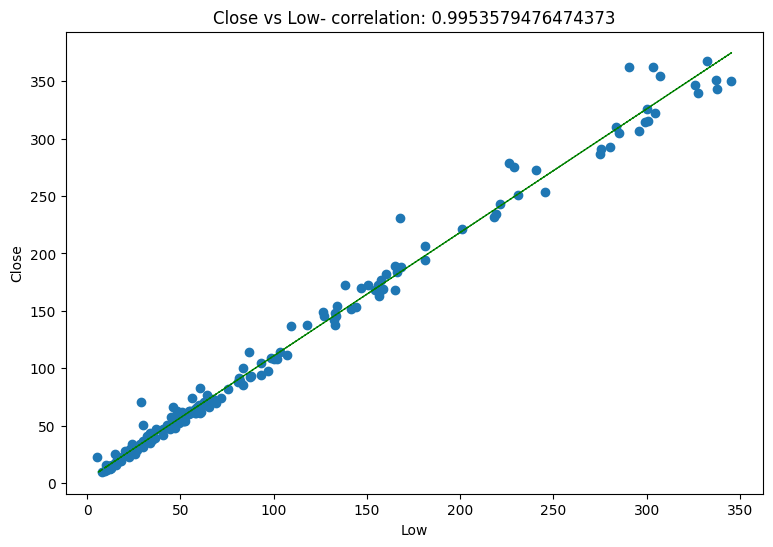

In [26]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['Low']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Low' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['Low'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['Low'])

plt.plot(YBC_df['Low'], y_hat, "g--", lw=1)

plt.show()

**1. Why did you pick the specific chart?**

The above scatter plot shows the relation between the Low and Close.

**2. What is/are the insight(s) found from the chart?**

Also we can see that the Low and Close data are also Highly correlated therefore we can say that the closing price is also very much dependant on the Low price of the stock.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Low and Price indicates that Low price will also play an important role to have an idea about closing price.

### **Chart - 7**

**Bivariate Analysis**

In [27]:
ax=px.line(YBC_df,YBC_df['Date'],YBC_df['Close'],title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()

**1. Why did you pick the specific chart?**

As I am doing bivariate analysis. Therefore the above line plot shows the relationship between the 'Date' column and the closing price.

**2. What is/are the insight(s) found from the chart?**

From the above chart it can be seen that there was consistant overall growth in the stock price till 2014 afcourse with some downfalls. But after 2014 the stock price started raise high and from 2016 through 2018 the growth was very impressive some times the stock price raised to over 350. But in the year of 2020 there was heavy downfall in the stock prices. The reason must be the fraud case for which one of the founder of the bank was arrested which is known to all.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight is showing the overall trends of the stock price throughout the year. By just seeing the trend we can have an idea as when to invest for buying yes bank shares.

### **Chart - 8**

**Correlation Heatmap**

<Axes: >

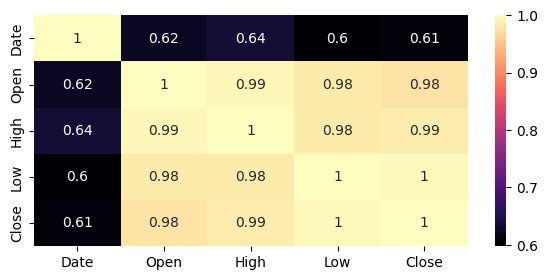

In [28]:
plt.figure(figsize=(7,3))
sns.heatmap(YBC_df.corr(),annot=True,cmap='magma')

**1. Why did you pick the specific chart?**

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

Therefore, to show the relations between the varriables we have used this plot.

**2. What is/are the insight(s) found from the chart?**

From the above chart we can se that each and every feature here is highly correlated to each other. As the linear Regression assumes that there is no multicolinearity therefore we will try to reduce the multicolinearity using transformation of variables and generating new features.

### **Chart - 9**

**Pair Plot**

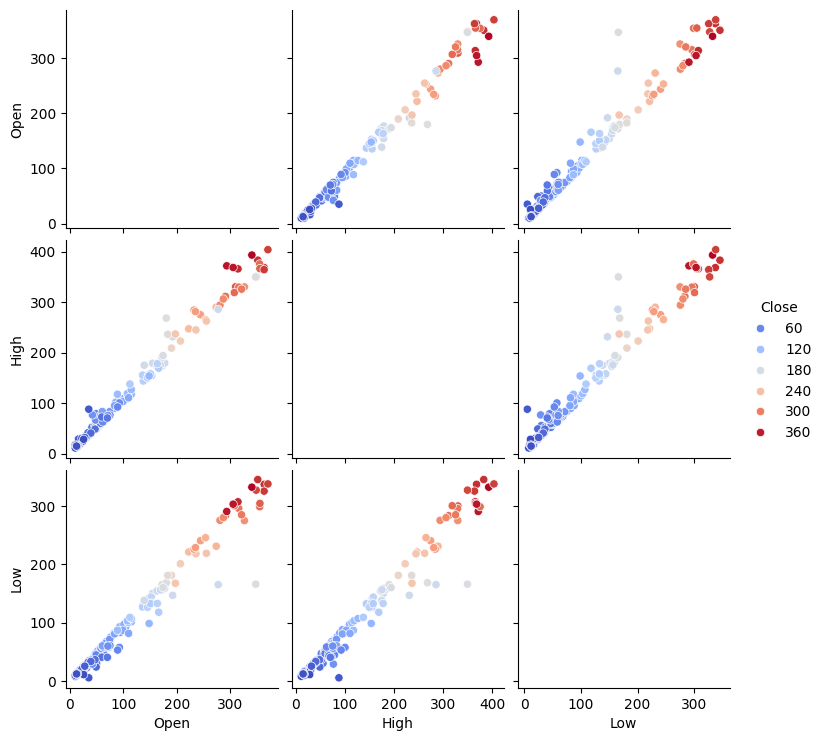

In [29]:
sns.pairplot(YBC_df,hue="Close", palette="coolwarm")

**1. Why did you pick the specific chart?**

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

**2. What is/are the insight(s) found from the chart?**

As I have used Close in the hue variable so the above plot will show the distribution of Close with the different type of columns.

## **5. Hypothesis Testing**

Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### **Hypothetical Statement - 1**

**1. State your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis (H₀):
There is no significant difference between the mean of Open and Close prices.

Alternate Hypothesis (H₁):
There is a significant difference between the mean of Open and Close prices.

**2. Perform an appropriate statistical test.**

In [30]:
# Perform the paired t-test again to obtain the p-value for Statement 1
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(df['Open'], df['Close'])

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 0.220963420803944
p-value: 0.825365920365391


**Which statistical test have you done to obtain P-Value?**

I have used Paired t-test (also known as the dependent t-test) statistical test for obtaining the P-Value.

**Why did you choose the specific statistical test?**

A **paired t-test** was used to compare the `Open` and `Close` stock prices of Yes Bank to determine if there is a significant difference between their means. This test is appropriate because both variables are continuous and measured on the same dates, making them dependent samples. The goal was to statistically verify whether the observed difference in prices is meaningful. The paired t-test provides a **p-value**, which indicates the significance of this difference. Based on the p-value, we can conclude whether to accept or reject the null hypothesis.


### **Hypothetical Statement - 2**

**1. State your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis (H₀):
The Close price is not significantly correlated with the High price.

Alternate Hypothesis (H₁):
The Close price is significantly correlated with the High price.

**2. Perform an appropriate statistical test.**

In [31]:
# Perform the paired t-test again to obtain the p-value for Statement 1
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(df['Close'], df['High'])

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -7.671283552010871
p-value: 9.595922567962836e-13


**Which statistical test have you done to obtain P-Value?**

I have used Paired t-test (also known as the dependent t-test) statistical test for obtaining the P-Value.

**Why did you choose the specific statistical test?**

A paired t-test was used to compare the Close and High stock prices of Yes Bank to determine if there is a significant difference between their means. This test is appropriate because both variables are continuous and measured on the same dates, making them dependent samples. The goal was to statistically verify whether the observed difference in prices is meaningful. The paired t-test provides a p-value, which indicates the significance of this difference. Based on the p-value, we can conclude whether to accept or reject the null hypothesis.

### **Hypothetical Statement - 3**

**1. State your research hypothesis as a null hypothesis and alternate hypothesis.**

Null Hypothesis (H₀):
The Close prices are normally distributed.

Alternate Hypothesis (H₁):
The Close prices are not normally distributed.

**2. Perform an appropriate statistical test.**

In [32]:
shapiro_stat, p_value = shapiro(df['Close'])
print(f"Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {p_value}")


Shapiro-Wilk Test Statistic: 0.8169774630493756, p-value: 5.694179117606817e-14


**Which statistical test have you done to obtain P-Value?**

I have used Shapiro-Wilk test to obtained the P-Value.

**Why did you choose the specific statistical test?**

In Hypothetical Statement 3, we are comparing the mean Close prices before and after 2018 using an independent t-test.

But — the independent t-test assumes normality of the data in both groups.

So before performing the t-test, it's important to verify the normality assumption of both groups using the Shapiro-Wilk test.

##**6. Feature Engineering & Data Pre-processing**

### **1. Handling Missing Values**

There are no missing values and null values in the dataset

### **2. Handling Outliers**

In [ ]:
# Handling Outliers & Outlier treatments
fig=px.box(YBC_df['Open'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YBC_df['Open']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(YBC_df['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YBC_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(YBC_df['Low'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [ ]:
fig=px.box(np.log10(YBC_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

<Axes: xlabel='Close', ylabel='Density'>

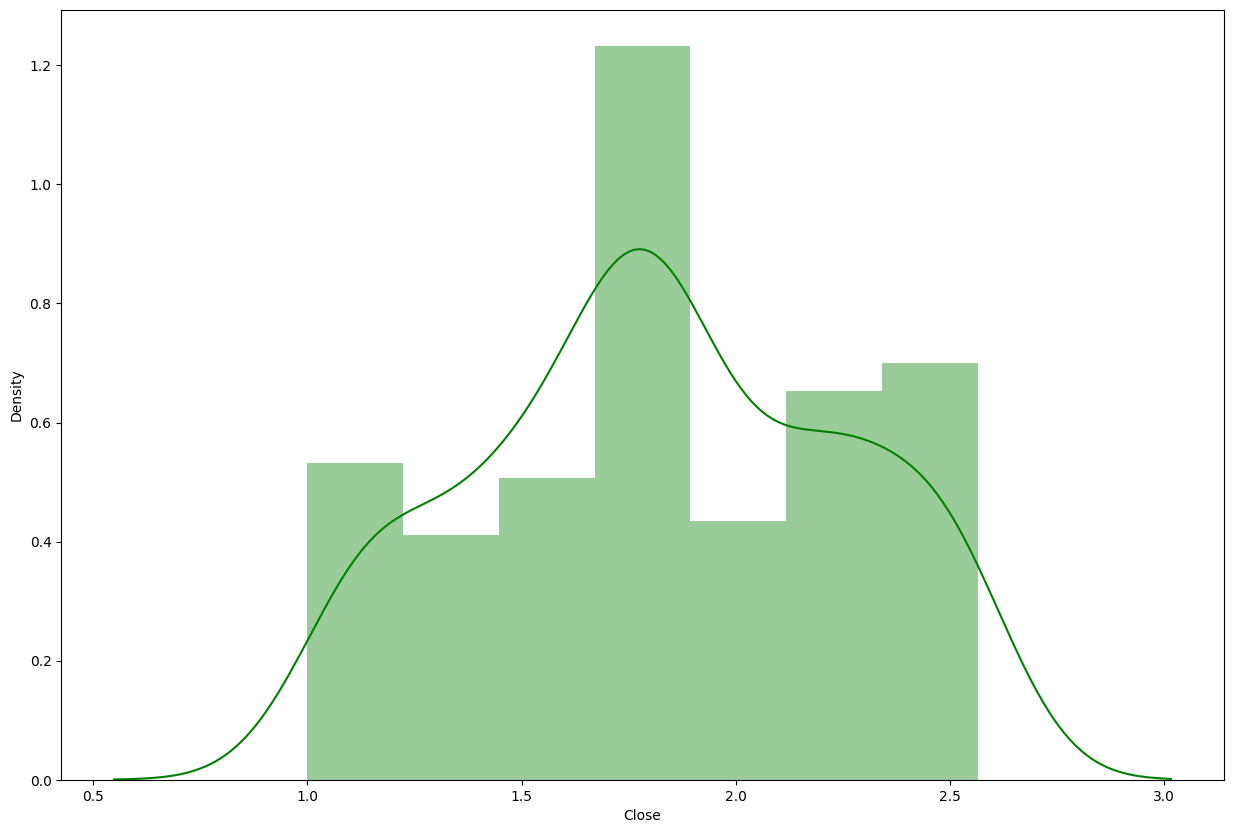

In [ ]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(YBC_df['Close']),color="g")

In [ ]:
YBC_df.set_index('Date' , inplace=True)

In [ ]:
#Generating a new feature to tackle the high multicolinearity.
YBC_df['average'] = YBC_df[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [ ]:
YBC_df.head(10)

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37
2005-12-01,13.49,14.44,13.00,13.71,13.64
2006-01-01,13.68,17.16,13.58,15.33,14.81
2006-02-01,15.50,16.97,15.40,16.12,15.96
2006-03-01,16.20,20.95,16.02,20.08,17.72


In [ ]:
dependant_variable='Close'

In [ ]:
Independant_variable=list(set(YBC_df.columns.tolist())-{dependant_variable})

In [ ]:
x= np.log10(YBC_df[Independant_variable]).values

In [ ]:
y=np.log10(YBC_df[dependant_variable]).values

**What all outlier treatment techniques have you used and why did you use those**

There were 3 numeric features that had outliers, as seen in the box plot. To fix the outliers and reduce skewness, I applied log base 10 to all numeric columns. After converting the values, I checked them again using box plots and saw that the outliers were gone. The price column also now looks like it follows a normal distribution.



### **4. Feature Manipulation & Selection**

**1. Feature Manipulation**

In [37]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

def calc_vif(X):
    if not np.isfinite(X).all().all():
        print("Warning: Non-finite values found. Replacing with NaN and dropping rows.")
        X = X.replace([np.inf, -np.inf], np.nan).dropna()
        if X.empty:
             print("After handling non-finite values, the DataFrame is empty. Cannot calculate VIF.")
             return pd.DataFrame(columns=["variables", "VIF"])

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

numeric_cols = YBC_df.select_dtypes(include=np.number).columns
YBC_df_numeric = YBC_df[numeric_cols]
calc_vif(YBC_df_numeric)

,variables,VIF
0,Open,288.504853
1,High,323.952468
2,Low,424.612257
3,Close,428.401649


### **5. Data Transformation**

In [40]:
# Transform Your data

# Define the dependent variable
dependant_variable='Close'

# Define the independent variables by excluding the dependent variable from the numeric columns
numeric_cols = YBC_df.select_dtypes(include=np.number).columns
Independant_variable=list(set(numeric_cols.tolist())-{dependant_variable})

x=np.log10(YBC_df[Independant_variable]).values
y=np.log10(YBC_df[dependant_variable]).values

**Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?**

Yes, The datas are needed to be transformed. It has been already seen that all the independent variables and target variables are possitive skewed and they also have outliers. so to tackle both the problem I have used log10 transformation.

### **6. Data Splitting**

In [41]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


**What data splitting ratio have you used and why?**

Here I have used the most common or standard spliting of the dataset which is 80/20. 80% of the dataset is to train the algorithm and 20% is for test.

### **7. Data Scaling**

In [42]:
# Scaling your data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Which method have you used to scale you data and why?**

Here I have used minmaxscaler method to scale the data since all the independent variables are not normally distributed. so to make sure every independent variables contribute almost equally to the analysis the minmaxscaler method is used.

## **7. ML Model Implementation**

### **ML Model - 1**

**Linear Regression**

In [44]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train, y_train)

LinearRegression()

In [45]:
regressor.intercept_

np.float64(0.8870482548617216)

In [46]:
regressor.coef_

array([ 1.23734697, -0.85498082,  1.30428821])

In [47]:
y_pred_train = regressor.predict(x_train)
#predicting the test results
y_pred = regressor.predict(x_test)

In [48]:
y_train

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [49]:
#predicted closing price on the test data set
y_pred

array([1.4912247 , 2.14465448, 1.67394233, 2.14226908, 1.82201368,
       1.50794844, 2.36203842, 1.21545331, 1.1371433 , 2.35044359,
       2.47496559, 1.94884657, 2.17801307, 1.76486858, 2.52493353,
       2.42732103, 1.86087272, 1.44166154, 2.43034707, 1.70644715,
       0.97157347, 2.07290633, 2.1784174 , 1.76898738, 2.3338384 ,
       1.71921499, 2.40515731, 1.12251144, 2.02871592, 1.72293253,
       2.57183854, 2.55026271, 1.86725537, 2.22192748, 1.59041597,
       1.67502755, 2.41083039])

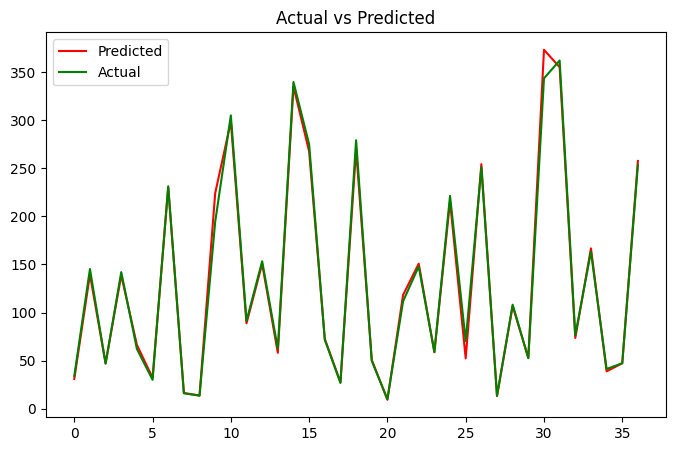

In [52]:
# now we will visualize the comparison between actual values and predicted values of the target variable.
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred), color='red')
plt.plot(np.array(10**(y_test)), color='green')
plt.title('Actual vs Predicted')
plt.legend(["Predicted","Actual"])
plt.show()

In [53]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [54]:
# Visualizing evaluation Metric Score chart
Lr_MSE=mean_squared_error(10**(y_test), 10**(y_pred))
Lr_MSE

70.42040616145451

In [55]:
mse_train=mean_squared_error(10**(y_train), 10**(y_pred_train))

In [56]:
mse_train

53.153383864528216

In [57]:
# Train performance
rmse_train=np.sqrt(mse_train)

In [58]:
rmse_train

np.float64(7.290636725590448)

In [59]:
# Test performance
Lr_RMSE = np.sqrt(Lr_MSE)
Lr_RMSE

np.float64(8.39168672922521)

In [60]:
Lr_MAE=mean_absolute_error(10**(y_test), 10**(y_pred))

In [61]:
Lr_MAE

4.816779252269835

In [62]:
mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))

0.04916525251700236

In [63]:
Lr_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred))
Lr_MAPE

0.039013742616820474

In [64]:
r2_score(y_train, y_pred_train)

0.9947900553430551

In [65]:
#Test performance
Lr_R2_score=r2_score(y_test, y_pred)
Lr_R2_score

0.9956268809883747

In [66]:
Matrics_score=pd.DataFrame({'mean squared error':[Lr_MSE],'root mean squared error':[Lr_RMSE],'mean absolute error':[Lr_MAE], 'mean absolute percentage error':[Lr_MAPE], 'r2_score':[Lr_R2_score],})

In [67]:
Matrics_score

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2_score
0,70.420406,8.391687,4.816779,0.039014,0.995627


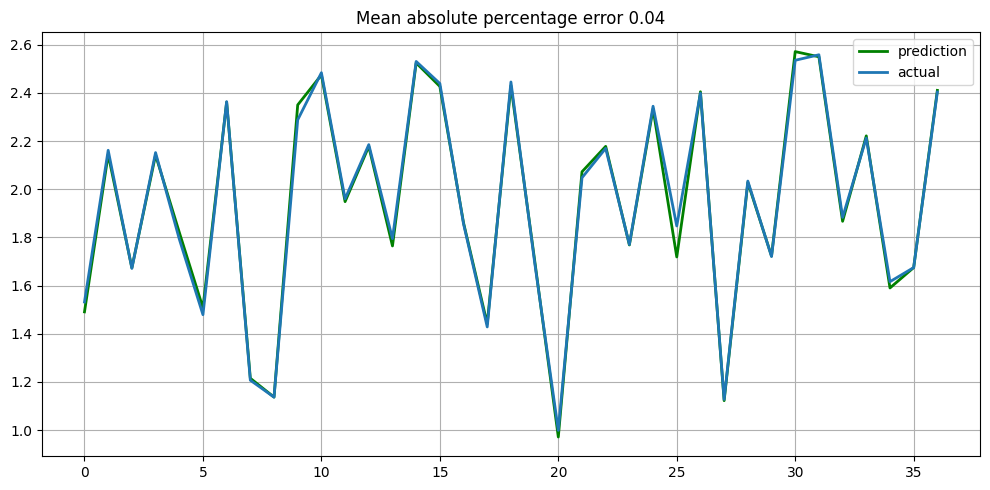

In [68]:
# function to plot model performance
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(Lr_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(regressor, plot_intervals=True)

### **ML Model - 2**

**Randomforest Regression**

In [101]:
Regressor = RandomForestRegressor()
grid_values = {'n_estimators':[100, 150,  200], 'max_depth':[20,30, 50, 100]}
Regressor = GridSearchCV(Regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
Regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 30, 50, 100],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc')

In [102]:
print(f'Best parameters: {Regressor.best_params_}')

Best parameters: {'max_depth': 20, 'n_estimators': 100}


In [103]:
train_preds =  Regressor.predict(x_train)
test_preds  = Regressor.predict(x_test)

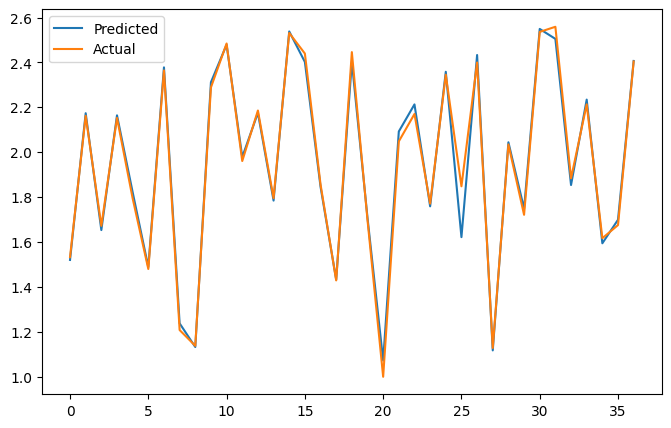

In [104]:
plt.figure(figsize=(8,5))
plt.plot(test_preds)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

**Which hyperparameter optimization technique have you used and why?**

Here for all the models I have used grid search cross validation technique since I have already the hyper parameter numbers and also the search space that is the data set is very small. so as per my understanding grid search cv woould be the best choioce to tune the hyper parameter.

**Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

Yes After using grid search cv for each model the performance is improved. for example for lasso regression one of the evaluation matrix the mean absolute percentage error before cross validation is MAPE : 0.7547254629560559 but after using cross validation the same mevaluation matrix for the test data became MAPE : 0.04091633443973601. Therefore, it can be established that after using crossvalidation the the performance was improved. That can be visualized also in the above plots.

**Which Evaluation metrics did you consider for a positive business impact and why?**

Since this problem is related to regression so I would choose the root mean square error evaluation metrics for possitive business impact. The root mean square error not only measures the difference between the actual and predicted values it also indicates the effect of large errors.

**Which ML model did you choose from the above created models as your final prediction model and why?**

From all the above models for lasso and elasticnet regressions the evaluation matricses for test data set are almost close to each other. So as per my understanding we can use elasticnet regressor for now. However it will be very early to pick a model at this point of time since the dataset is very small as we need more data so that the algorithms get more training data to learn more and improve their accuracy.

### **ML Model - 3**

**Ridge Regression with cross validation**

In [69]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [70]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0012860413800477105


In [71]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [72]:
y_pred_ridge

array([1.49473499, 2.1476822 , 1.68414109, 2.1424701 , 1.81903062,
       1.50325345, 2.36264353, 1.21586733, 1.13897771, 2.34249124,
       2.47678321, 1.95468143, 2.17868013, 1.76685744, 2.52614829,
       2.42205707, 1.86103656, 1.43968401, 2.42430392, 1.70843505,
       0.97451859, 2.07187642, 2.17970951, 1.76683498, 2.3324598 ,
       1.70586231, 2.40633484, 1.12538544, 2.02959507, 1.72855112,
       2.57049332, 2.54245975, 1.86404396, 2.22332398, 1.59005076,
       1.67713627, 2.4104262 ])

In [73]:
y_test

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

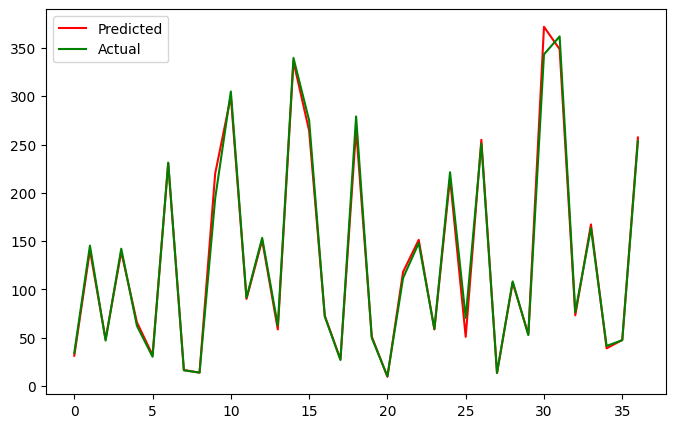

In [75]:
#now we will visualize the comparison between actual values and predicted values of the target variable.
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge), color='red')
plt.plot(10**(np.array(y_test)), color = 'green')
plt.legend(["Predicted","Actual"])
plt.show()

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

In [76]:
R_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , R_MSE)

MSE : 70.76457964686806


In [77]:
R_RMSE = np.sqrt(R_MSE)
print("RMSE :" ,R_RMSE)

RMSE : 8.412168546033065


In [78]:
R_r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
R_r2

0.9937131136548145

In [79]:
R_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
R_MAE

5.030594437435534

In [80]:
R_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_ridge))
R_MAPE

0.03993555222249079

In [81]:
# Visualizing evaluation Metric Score chart
Matrics_score_ridge=pd.DataFrame({'mean squared error':[R_MSE],'root mean squared error':[R_RMSE],'mean absolute error':[R_MAE], 'mean absolute percentage error':[R_MAPE], 'r2_score':[R_r2],})

In [82]:
Matrics_score_ridge

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2_score
0,70.76458,8.412169,5.030594,0.039936,0.993713


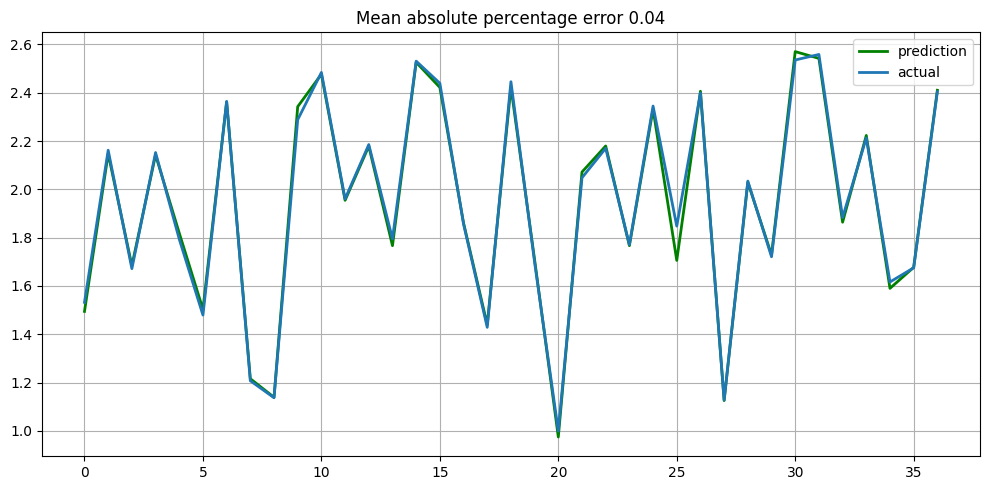

In [83]:
# function to plot model performance
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(R_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(ridge_regressor, plot_intervals=True)

In [84]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_ridge), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

# **Conclusion**

● The data set does not have any null values/missing values as well as duplicate values which made the analysis easy and smooth.

● I started with univariate analysis in which it can be seen that all the variables were positively skewed.

● In the section of bivariate analysis it can be seen that all the independent variables are having linear relationship with the dependent variable.

● While analysing the close price with date it can be seen that there was huge fall in the stock prices after year 2018.

● In the correlation heatmap chart it can be clearly seen that all the variables are highly correlated to each other which is a problem for linear regression.

● In the box plot section it can be seen that the independent variables are having some outliers.

● Also the date column was formatted to year-month-date format.

● To tackle the outliers, skewness and multicollinearity problem the data was transformed to log10 value and a new feature as average which is the mean of the prices for each row was generated.

● At last I have tried to implement 5 models in order to predict the closing stock prices and finally found that Elastic Net Regression model is the best performing model since it has better R² score value as well as other evaluation metrics values.

# **COMPLETED!!!**